In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/extracted_archive/MachineLearningCVE/balanced_dataset.csv')
display(df.head())

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,1024,48,2,0,4,0,2,2,2.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,53,260,2,2,72,454,36,36,36.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,57332,52,1,1,0,0,0,0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,443,246731,11,7,587,5527,191,0,53.363636,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,443,6209,5,0,37,0,37,0,7.400000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Check data types
print("Data Types:")
display(df.dtypes)

# Check for null values
print("\nNull Values:")
display(df.isnull().sum())

# Check for infinite values
print("\nInfinite Values:")
# Replace infinite values with NaN to easily count them
df_finite = df.replace([float('inf'), float('-inf')], float('nan'))
display(df_finite.isnull().sum())

Data Types:


,0
Unnamed: 0,int64
Destination Port,int64
Flow Duration,int64
Total Fwd Packets,int64
Total Backward Packets,int64
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,int64
Idle Min,int64



Null Values:


,0
Unnamed: 0,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0



Infinite Values:


,0
Unnamed: 0,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'Label' in numerical_cols:
    numerical_cols.remove('Label')

print("Numerical columns (excluding 'Label'):")
display(numerical_cols)

Numerical columns (excluding 'Label'):


['Unnamed: 0',
 'Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Fl

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)
df.dropna(subset=numerical_cols, inplace=True)

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
display(df.head())

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000000e+00,0.015625,4.083335e-07,0.000005,0.000000,3.100775e-07,0.000000e+00,0.000081,0.000969,0.000337,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,2.897650e-07,0.000809,2.175001e-06,0.000005,0.000007,5.581395e-06,7.430442e-07,0.001450,0.017433,0.006060,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,5.795301e-07,0.874830,4.416668e-07,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,8.692951e-07,0.006760,2.056101e-03,0.000048,0.000025,4.550388e-05,9.045827e-06,0.007695,0.000000,0.008982,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,1.159060e-06,0.006760,5.175002e-05,0.000019,0.000000,2.868217e-06,0.000000e+00,0.001491,0.000000,0.001246,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
for col in df.columns:
    if col != 'Label':
        df[col] = df[col].astype('float64')

display(df.head())
display(df.dtypes)

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000000e+00,0.015625,4.083335e-07,0.000005,0.000000,3.100775e-07,0.000000e+00,0.000081,0.000969,0.000337,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,2.897650e-07,0.000809,2.175001e-06,0.000005,0.000007,5.581395e-06,7.430442e-07,0.001450,0.017433,0.006060,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,5.795301e-07,0.874830,4.416668e-07,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,8.692951e-07,0.006760,2.056101e-03,0.000048,0.000025,4.550388e-05,9.045827e-06,0.007695,0.000000,0.008982,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,1.159060e-06,0.006760,5.175002e-05,0.000019,0.000000,2.868217e-06,0.000000e+00,0.001491,0.000000,0.001246,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


,0
Unnamed: 0,float64
Destination Port,float64
Flow Duration,float64
Total Fwd Packets,float64
Total Backward Packets,float64
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,float64
Idle Min,float64


In [ ]:
display(df.head())
display(df.dtypes)

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000000e+00,0.015625,4.083335e-07,0.000005,0.000000,3.100775e-07,0.000000e+00,0.000081,0.000969,0.000337,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,2.897650e-07,0.000809,2.175001e-06,0.000005,0.000007,5.581395e-06,7.430442e-07,0.001450,0.017433,0.006060,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,5.795301e-07,0.874830,4.416668e-07,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,8.692951e-07,0.006760,2.056101e-03,0.000048,0.000025,4.550388e-05,9.045827e-06,0.007695,0.000000,0.008982,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,1.159060e-06,0.006760,5.175002e-05,0.000019,0.000000,2.868217e-06,0.000000e+00,0.001491,0.000000,0.001246,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


,0
Unnamed: 0,float64
Destination Port,float64
Flow Duration,float64
Total Fwd Packets,float64
Total Backward Packets,float64
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,float64
Idle Min,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

print("Original Labels and Encoded Values:")
for original_label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_label}: {encoded_value}")

display(df.head())

Original Labels and Encoded Values:
BENIGN: 0
Bot: 1
DDoS: 2
DoS GoldenEye: 3
DoS Hulk: 4
DoS Slowhttptest: 5
DoS slowloris: 6
FTP-Patator: 7
Heartbleed: 8
Infiltration: 9
PortScan: 10
SSH-Patator: 11
Web Attack � Brute Force: 12
Web Attack � Sql Injection: 13
Web Attack � XSS: 14


,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_Encoded
0,0.000000e+00,0.015625,4.083335e-07,0.000005,0.000000,3.100775e-07,0.000000e+00,0.000081,0.000969,0.000337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
1,2.897650e-07,0.000809,2.175001e-06,0.000005,0.000007,5.581395e-06,7.430442e-07,0.001450,0.017433,0.006060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
2,5.795301e-07,0.874830,4.416668e-07,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
3,8.692951e-07,0.006760,2.056101e-03,0.000048,0.000025,4.550388e-05,9.045827e-06,0.007695,0.000000,0.008982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
4,1.159060e-06,0.006760,5.175002e-05,0.000019,0.000000,2.868217e-06,0.000000e+00,0.001491,0.000000,0.001246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0


In [ ]:
X = df.drop(['Label', 'Label_Encoded'], axis=1)
y = df['Label_Encoded']

print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000000e+00,0.015625,4.083335e-07,0.000005,0.000000,3.100775e-07,0.000000e+00,0.000081,0.000969,0.000337,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.897650e-07,0.000809,2.175001e-06,0.000005,0.000007,5.581395e-06,7.430442e-07,0.001450,0.017433,0.006060,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.795301e-07,0.874830,4.416668e-07,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.692951e-07,0.006760,2.056101e-03,0.000048,0.000025,4.550388e-05,9.045827e-06,0.007695,0.000000,0.008982,...,0.000050,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.159060e-06,0.006760,5.175002e-05,0.000019,0.000000,2.868217e-06,0.000000e+00,0.001491,0.000000,0.001246,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Target (y):


,Label_Encoded
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2758850, 79)
Shape of X_test: (689713, 79)
Shape of y_train: (2758850,)
Shape of y_test: (689713,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Accuracy: 0.9999971002431446
Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     45632
                       Bot       1.00      1.00      1.00     45781
                      DDoS       1.00      1.00      1.00     46141
             DoS GoldenEye       1.00      1.00      1.00     46036
                  DoS Hulk       1.00      1.00      1.00     46068
          DoS Slowhttptest       1.00      1.00      1.00     46282
             DoS slowloris       1.00      1.00      1.00     46117
               FTP-Patator       1.00      1.00      1.00     45464
                Heartbleed       1.00      1.00      1.00     46033
              Infiltration       1.00      1.00      1.00     46147
                  PortScan       1.00      1.00      1.00     45919
               SSH-Patator       1.00      1.00      1.00     46006
  Web Attack � Brute Force       1.00      1.00      1.00     4

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)

print("XGBoost model training completed.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:18:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model training completed.


In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

class_report_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_)
print("XGBoost Classification Report:")
print(class_report_xgb)

XGBoost Accuracy: 0.9997520707888643
XGBoost Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     45632
                       Bot       1.00      1.00      1.00     45781
                      DDoS       1.00      1.00      1.00     46141
             DoS GoldenEye       1.00      1.00      1.00     46036
                  DoS Hulk       1.00      1.00      1.00     46068
          DoS Slowhttptest       1.00      1.00      1.00     46282
             DoS slowloris       1.00      1.00      1.00     46117
               FTP-Patator       1.00      1.00      1.00     45464
                Heartbleed       1.00      1.00      1.00     46033
              Infiltration       1.00      1.00      1.00     46147
                  PortScan       1.00      1.00      1.00     45919
               SSH-Patator       1.00      1.00      1.00     46006
  Web Attack � Brute Force       1.00      1.00

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg_model = LogisticRegression(max_iter=100, random_state=42)
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model training completed.")

Logistic Regression model training completed.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate and print the accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")

# Print the classification report as well for a more comprehensive evaluation
class_report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_)
print("Logistic Regression Classification Report:")
print(class_report_log_reg)

Logistic Regression Accuracy: 0.9757739813516637
Logistic Regression Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       0.99      0.99      0.99     45632
                       Bot       1.00      0.94      0.97     45781
                      DDoS       0.99      1.00      1.00     46141
             DoS GoldenEye       1.00      0.99      0.99     46036
                  DoS Hulk       0.99      1.00      1.00     46068
          DoS Slowhttptest       0.96      0.91      0.94     46282
             DoS slowloris       0.92      0.95      0.93     46117
               FTP-Patator       1.00      1.00      1.00     45464
                Heartbleed       1.00      1.00      1.00     46033
              Infiltration       1.00      0.97      0.98     46147
                  PortScan       0.94      0.99      0.97     45919
               SSH-Patator       0.97      0.99      0.98     46006
  Web Attack � Brute Fo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # Input layer
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128, activation='relu')) # Hidden layer 1
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128, activation='relu')) # Hidden layer 2
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128, activation='relu')) # Hidden layer 3
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128, activation='relu')) # Hidden layer 4
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128, activation='relu')) # Hidden layer 5
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128, activation='relu')) # Hidden layer 6
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128, activation='relu')) # Hidden layer 7
model_nn.add(Dropout(0.2))
model_nn.add(Dense(128, activation='relu')) # Hidden layer 8
model_nn.add(Dropout(0.2))
model_nn.add(Dense(len(label_encoder.classes_), activation='softmax')) # Output layer

# Compile the model
model_nn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_nn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,271 (563.56 KB)

 Trainable params: 144,271 (563.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model_nn.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 358s 5ms/step - accuracy: 0.9231 - loss: 0.2366 - val_accuracy: 0.9916 - val_loss: 0.0278
Epoch 2/10
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 356s 5ms/step - accuracy: 0.9813 - loss: 0.0727 - val_accuracy: 0.9916 - val_loss: 0.0269
Epoch 3/10
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 344s 5ms/step - accuracy: 0.9818 - loss: 0.0743 - val_accuracy: 0.9954 - val_loss: 0.0254
Epoch 4/10
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 344s 5ms/step - accuracy: 0.9821 - loss: 0.0787 - val_accuracy: 0.9896 - val_loss: 0.0277
Epoch 5/10
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 336s 5ms/step - accuracy: 0.9816 - loss: 0.0826 - val_accuracy: 0.9945 - val_loss: 0.0263
Epoch 6/10
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 327s 5ms/step - accuracy: 0.9808 - loss: 0.0878 - val_accuracy: 0.9954 - val_loss: 0.0196
Epoch 7/10
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 317s 5ms/step - accuracy: 0.9808 - loss: 0.0956 - val_accuracy: 0.9923 - val_loss: 0.0268
Epoch 8/10
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 310s 4ms/step - ac

In [ ]:
# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

21554/21554 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9871 - loss: 0.0364
Test Loss: 0.036532338708639145
Test Accuracy: 0.9871671199798584


In [ ]:
# Print training history (loss and accuracy per epoch)
print("\nTraining History:")
for epoch, (hist_loss, hist_acc) in enumerate(zip(history.history['loss'], history.history['accuracy'])):
    print(f"Epoch {epoch+1}: Loss = {hist_loss:.4f}, Accuracy = {hist_acc:.4f}")


Training History:
Epoch 1: Loss = 0.1195, Accuracy = 0.9649
Epoch 2: Loss = 0.0734, Accuracy = 0.9813
Epoch 3: Loss = 0.0750, Accuracy = 0.9818
Epoch 4: Loss = 0.0800, Accuracy = 0.9818
Epoch 5: Loss = 0.0849, Accuracy = 0.9813
Epoch 6: Loss = 0.0891, Accuracy = 0.9808
Epoch 7: Loss = 0.0952, Accuracy = 0.9807
Epoch 8: Loss = 0.0932, Accuracy = 0.9807
Epoch 9: Loss = 0.0996, Accuracy = 0.9807
Epoch 10: Loss = 0.1043, Accuracy = 0.9796


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Reshape data for CNN (add channel dimension)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

# Train the model
history_cnn = model_cnn.fit(X_train_reshaped, y_train, epochs=5, validation_split=0.2)

# Evaluate the model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print(f"CNN Test Loss: {loss_cnn}")
print(f"CNN Test Accuracy: {accuracy_cnn}")

# Print training history
print("\nCNN Training History:")
for epoch, (hist_loss, hist_acc) in enumerate(zip(history_cnn.history['loss'], history_cnn.history['accuracy'])):
    print(f"Epoch {epoch+1}: Loss = {hist_loss:.4f}, Accuracy = {hist_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 77, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 36, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,855 (608.81 KB)

 Trainable params: 155,855 (608.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 347s 5ms/step - accuracy: 0.9665 - loss: 0.1046 - val_accuracy: 0.9940 - val_loss: 0.0175
Epoch 2/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 384s 6ms/step - accuracy: 0.9951 - loss: 0.0137 - val_accuracy: 0.9956 - val_loss: 0.0106
Epoch 3/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 376s 5ms/step - accuracy: 0.9964 - loss: 0.0102 - val_accuracy: 0.9980 - val_loss: 0.0064
Epoch 4/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 344s 5ms/step - accuracy: 0.9971 - loss: 0.0083 - val_accuracy: 0.9981 - val_loss: 0.0064
Epoch 5/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 342s 5ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 0.9975 - val_loss: 0.0068
21554/21554 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9975 - loss: 0.0066
CNN Test Loss: 0.006598625332117081
CNN Test Accuracy: 0.9975265264511108

CNN Training History:
Epoch 1: Loss = 0.0384, Accuracy = 0.9874
Epoch 2: Loss = 0.0124, Accuracy = 0.9956
Epoch 3: Loss = 0.0097, Accuracy = 0.9966
Epoch 4: Loss = 0.0079, Accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape data for LSTM (add time steps dimension)
# Assuming each feature is a time step, reshape X_train and X_test
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])


# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model_lstm.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_lstm.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       106,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,943 (488.06 KB)

 Trainable params: 124,943 (488.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 229s 3ms/step - accuracy: 0.9595 - loss: 0.1263 - val_accuracy: 0.9893 - val_loss: 0.0247
Epoch 2/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 225s 3ms/step - accuracy: 0.9925 - loss: 0.0214 - val_accuracy: 0.9974 - val_loss: 0.0112
Epoch 3/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 231s 3ms/step - accuracy: 0.9941 - loss: 0.0170 - val_accuracy: 0.9971 - val_loss: 0.0087
Epoch 4/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 233s 3ms/step - accuracy: 0.9948 - loss: 0.0151 - val_accuracy: 0.9950 - val_loss: 0.0119
Epoch 5/5
68972/68972 ━━━━━━━━━━━━━━━━━━━━ 227s 3ms/step - accuracy: 0.9952 - loss: 0.0135 - val_accuracy: 0.9930 - val_loss: 0.0181


In [ ]:
# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, y_test)
print(f"LSTM Test Loss: {loss_lstm}")
print(f"LSTM Test Accuracy: {accuracy_lstm}")

21554/21554 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9928 - loss: 0.0193
LSTM Test Loss: 0.01875823736190796
LSTM Test Accuracy: 0.9929405450820923


In [ ]:
# Print training history
print("\nLSTM Training History:")
for epoch, (hist_loss, hist_acc) in enumerate(zip(history_lstm.history['loss'], history_lstm.history['accuracy'])):
    print(f"Epoch {epoch+1}: Loss = {hist_loss:.4f}, Accuracy = {hist_acc:.4f}")


LSTM Training History:
Epoch 1: Loss = 0.0505, Accuracy = 0.9835
Epoch 2: Loss = 0.0200, Accuracy = 0.9931
Epoch 3: Loss = 0.0164, Accuracy = 0.9944
Epoch 4: Loss = 0.0145, Accuracy = 0.9950
Epoch 5: Loss = 0.0132, Accuracy = 0.9954


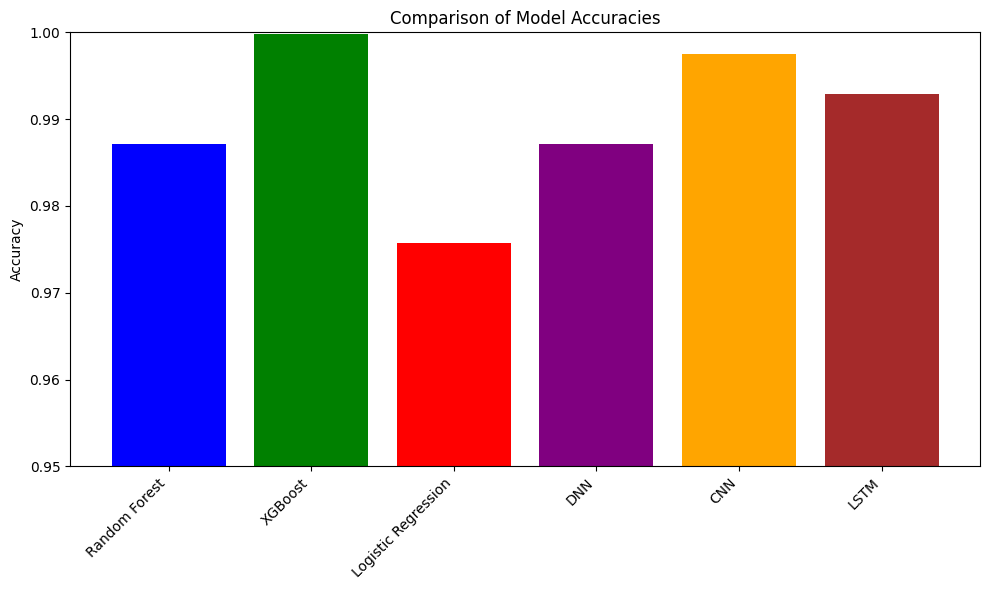


Model Performance Comparison:
Random Forest: Accuracy = 0.9872
XGBoost: Accuracy = 0.9998
Logistic Regression: Accuracy = 0.9758
DNN: Accuracy = 0.9872
CNN: Accuracy = 0.9975
LSTM: Accuracy = 0.9929


In [ ]:
import matplotlib.pyplot as plt

# Collect the results
model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'DNN', 'CNN', 'LSTM']
accuracies = [accuracy, accuracy_xgb, accuracy_log_reg, accuracy, accuracy_cnn, accuracy_lstm] # Note: accuracy is used twice as it was overwritten by the last DNN evaluation

# Create a bar chart to compare accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.95, 1.0) # Set y-axis limit for better visualization of high accuracies
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# You can also create a table or print the results for comparison
print("\nModel Performance Comparison:")
for name, acc in zip(model_names, accuracies):
    print(f"{name}: Accuracy = {acc:.4f}")

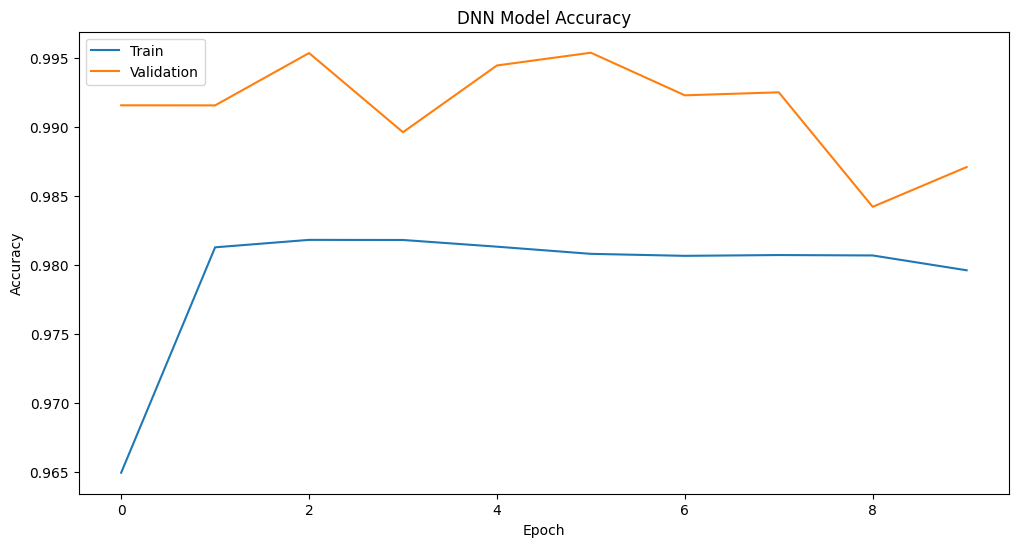

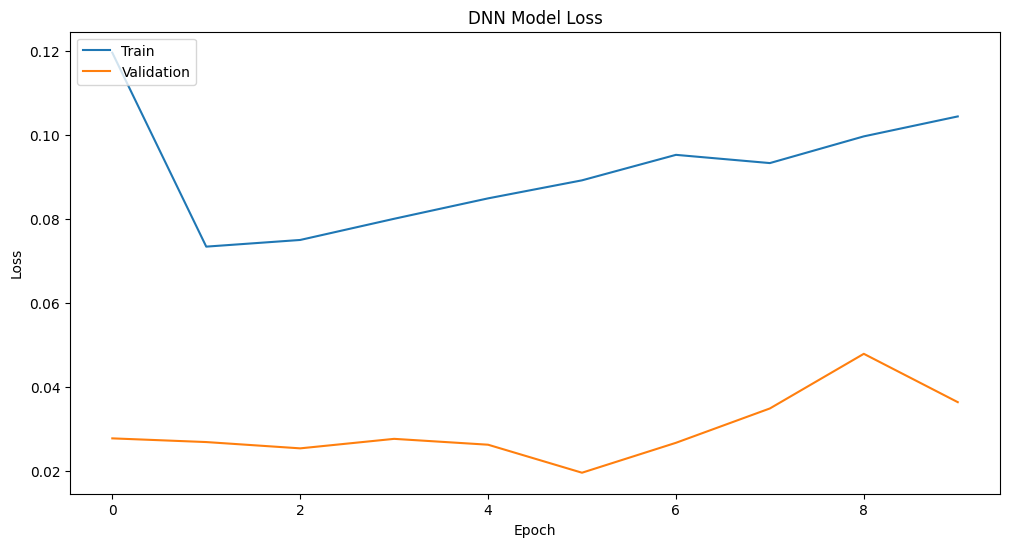

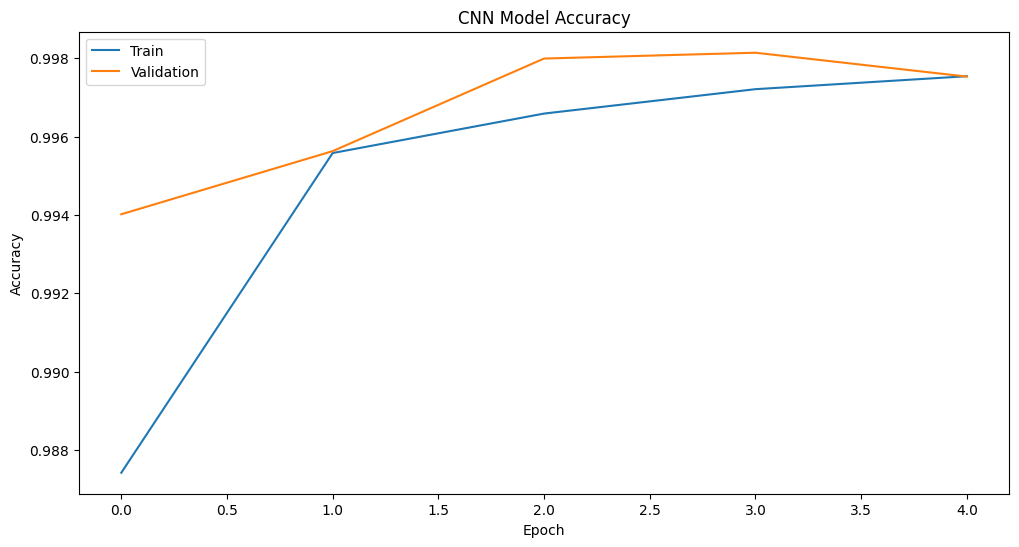

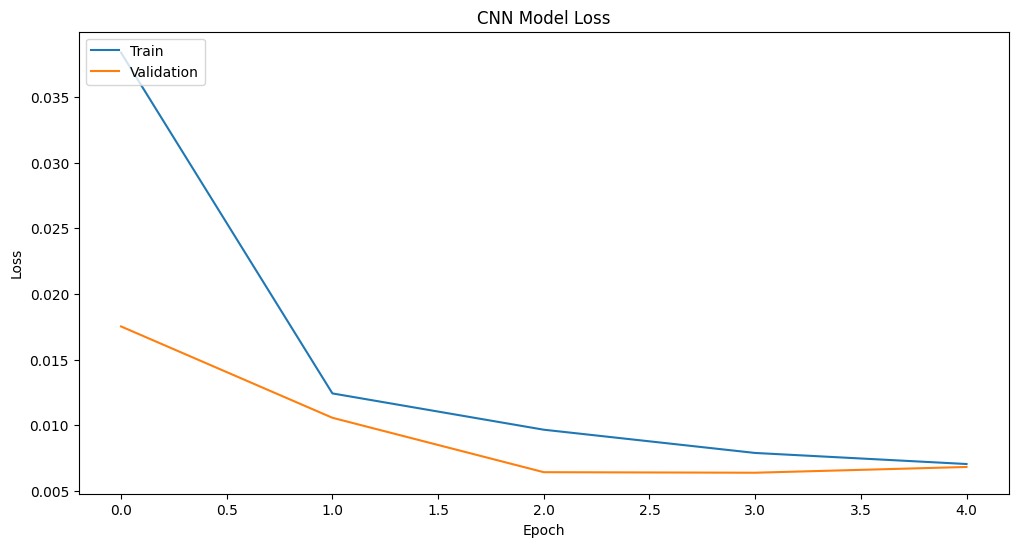

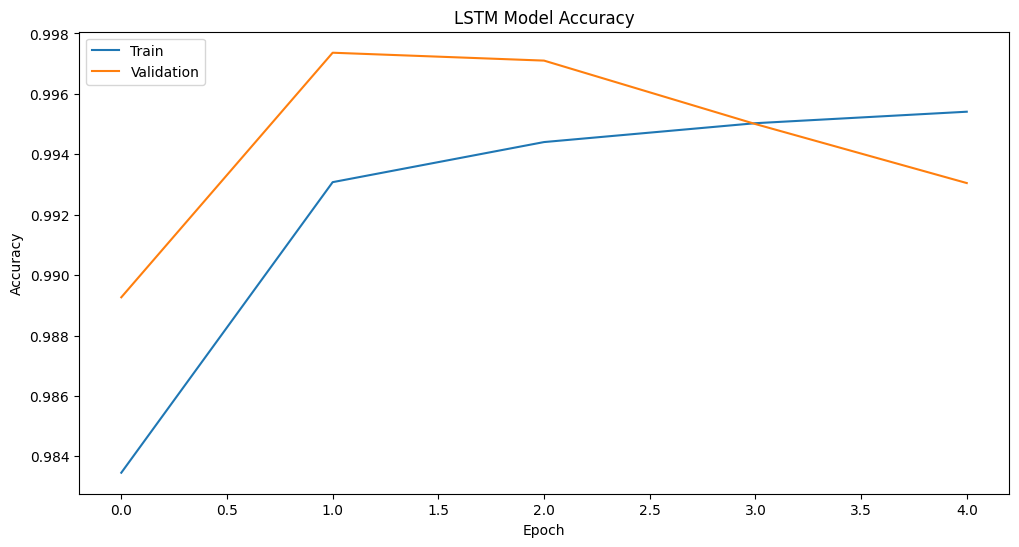

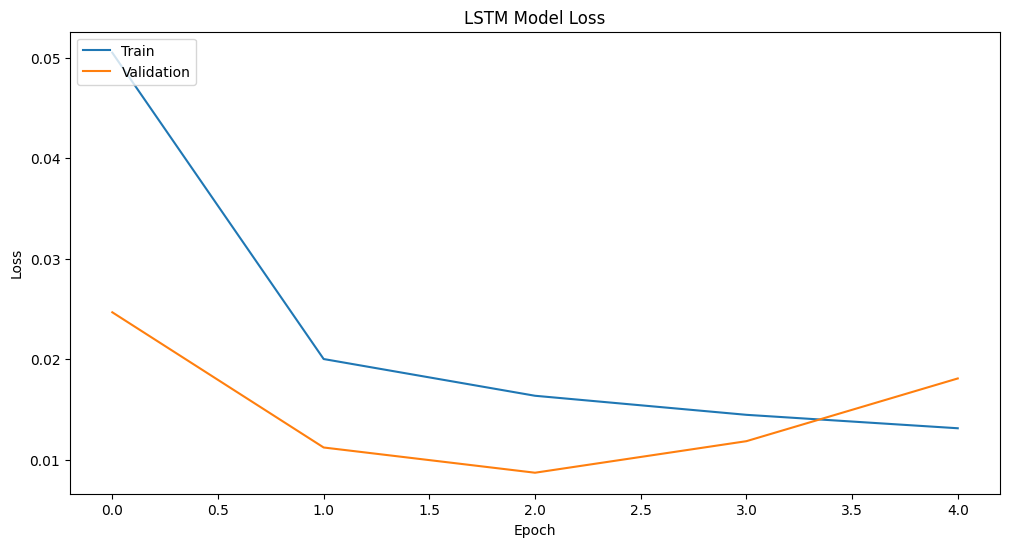

In [ ]:
# Plot training & validation accuracy values for DNN
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for DNN
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values for CNN
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for CNN
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values for LSTM
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for LSTM
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

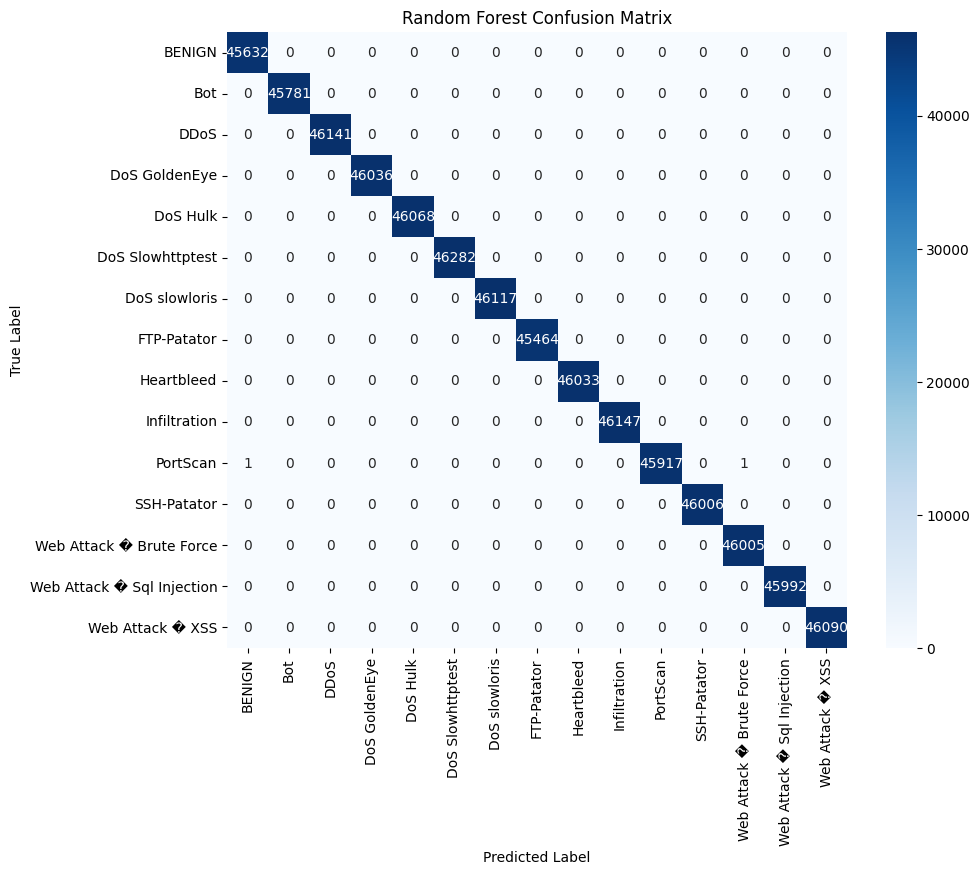

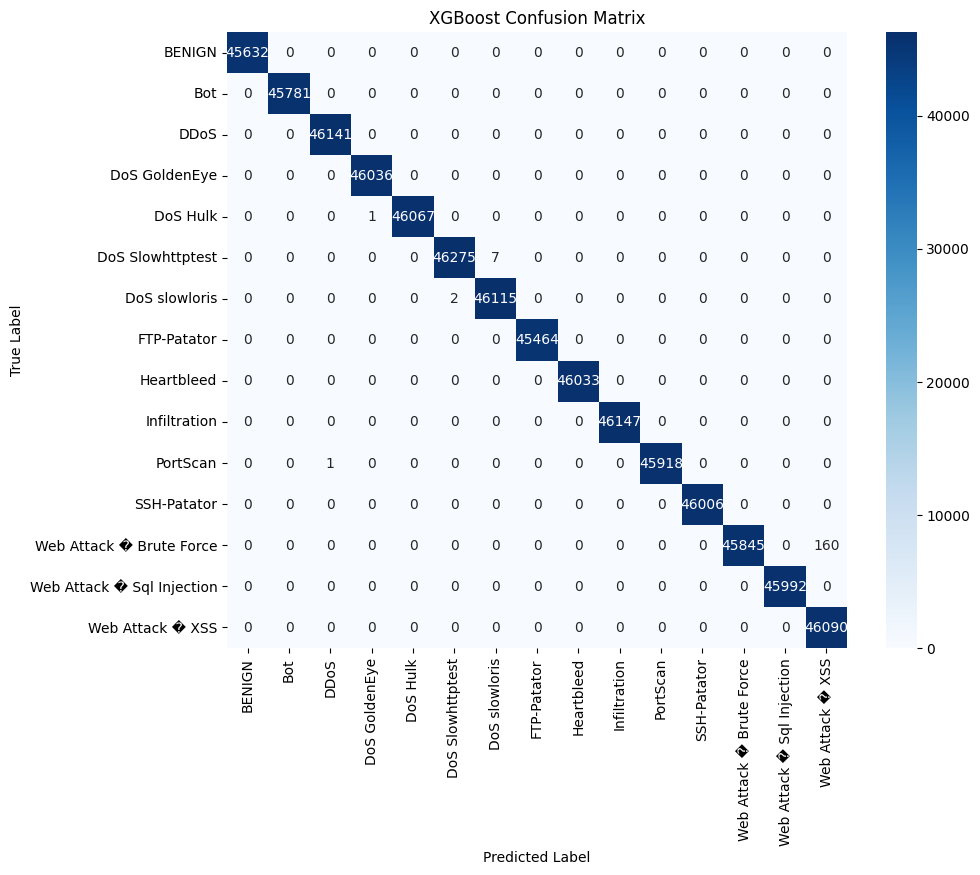

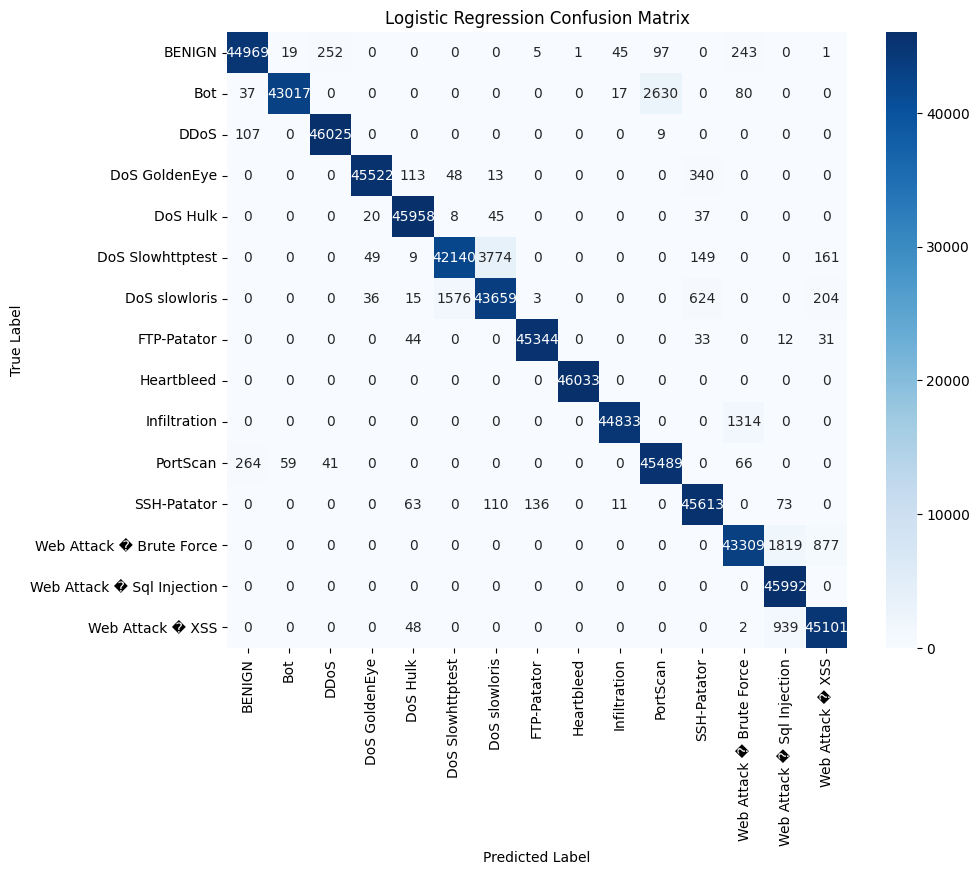

21554/21554 ━━━━━━━━━━━━━━━━━━━━ 21s 955us/step


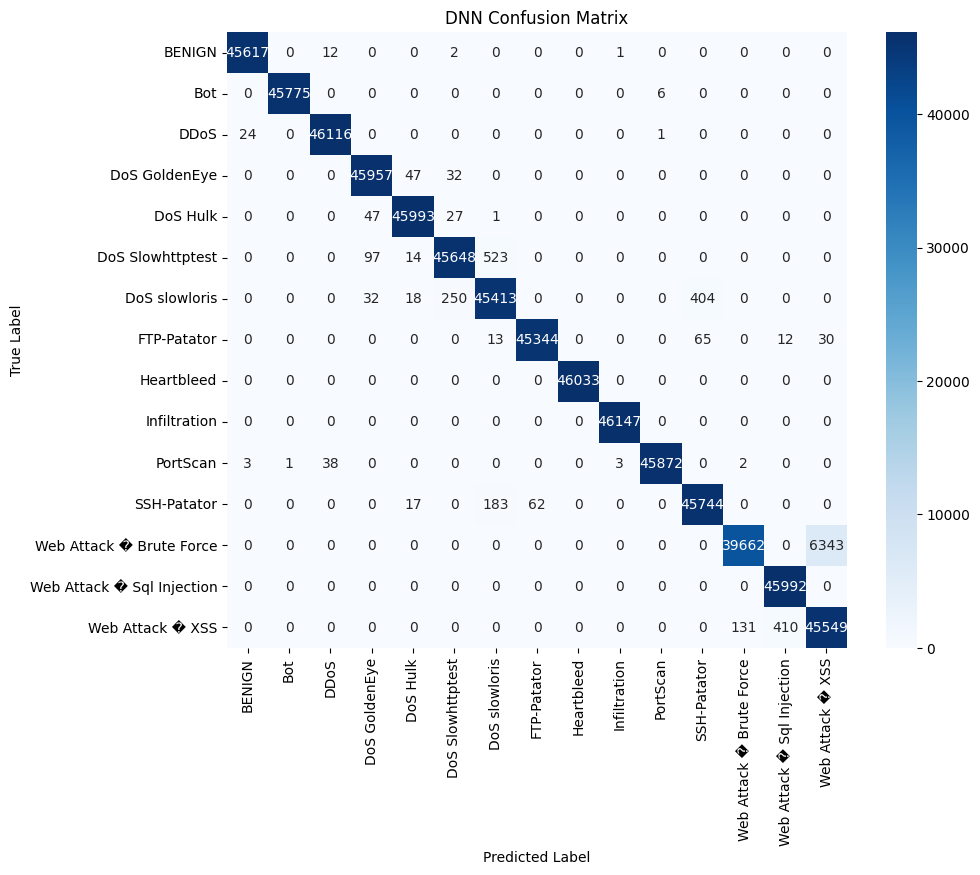

21554/21554 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step


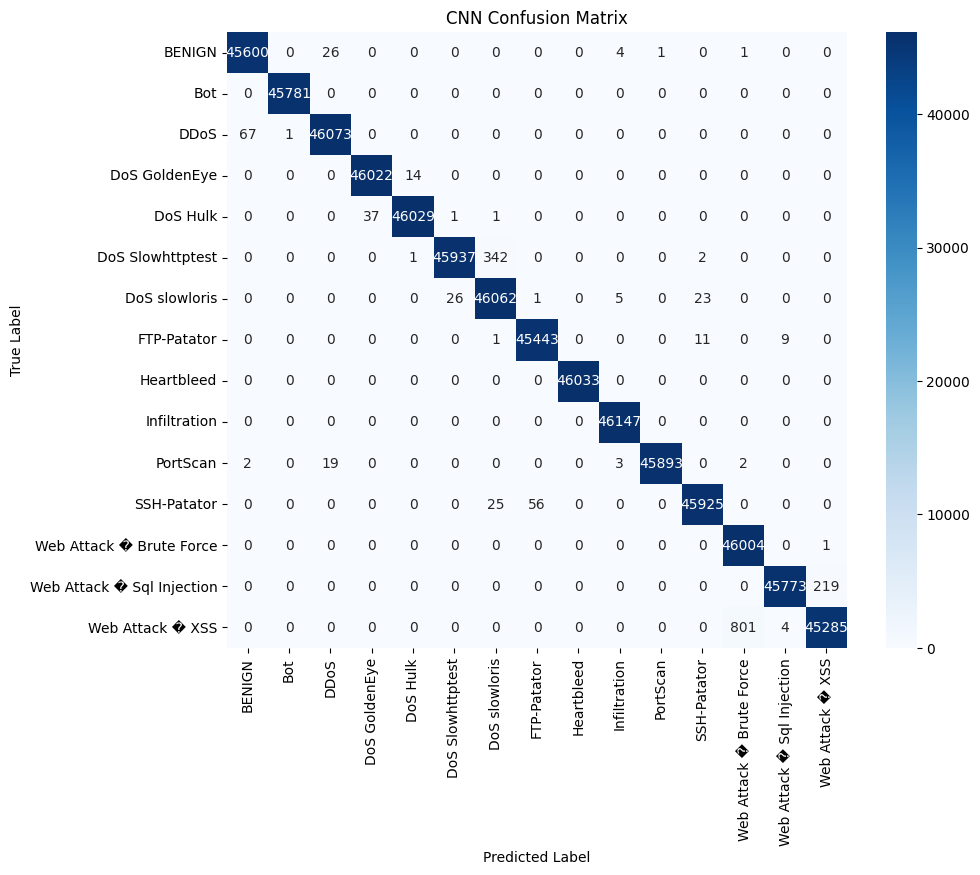

21554/21554 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


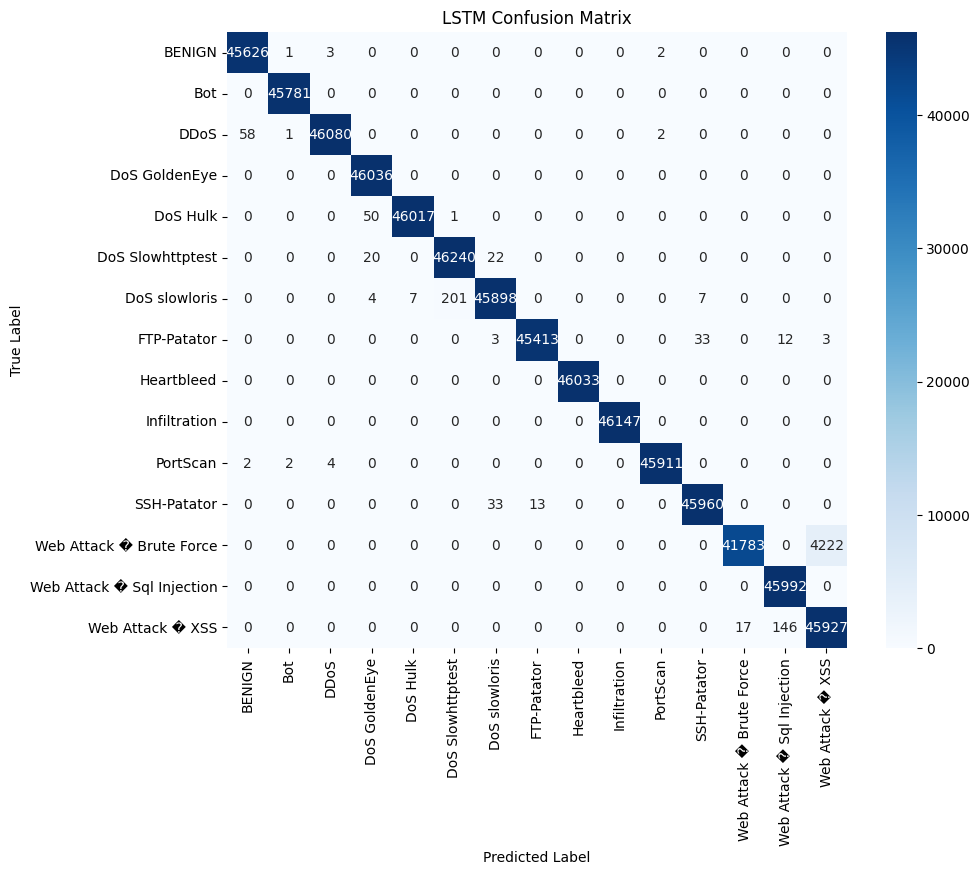

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Confusion Matrix for DNN
# Get predictions for DNN. The DNN model outputs probabilities, so we take the argmax to get the predicted class
y_pred_nn = model_nn.predict(X_test)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DNN Confusion Matrix')
plt.show()

# Confusion Matrix for CNN
# Get predictions for CNN. The CNN model outputs probabilities, so we take the argmax to get the predicted class
y_pred_cnn = model_cnn.predict(X_test_reshaped)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
cm_cnn = confusion_matrix(y_test, y_pred_cnn_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()

# Confusion Matrix for LSTM
# Get predictions for LSTM. The LSTM model outputs probabilities, so we take the argmax to get the predicted class
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
cm_lstm = confusion_matrix(y_test, y_pred_lstm_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LSTM Confusion Matrix')
plt.show()

In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')

print("Best model (XGBoost) saved successfully as 'xgboost_model.pkl'")